In [ ]:
#Importando bibliotecas para cálculo e criação de visualização gráfica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# O matplotlib inline é um comando que faz com que os gráficos abram no mesmo notebook que estou trabalhando
import seaborn as sns
import plotly.express as px

# Importando o arquivo, usando encoding utf-8 (Por ser um arquivo americano cobre todos os caracteres) e em seguida utilizando o .head() para ver se a exportação foi correta
caminho = "/content/drive/MyDrive/Data Science Acidentes/US_Accidents_Dec20_updated.csv"
importa_df = pd.read_csv(caminho, encoding='utf-8', sep=',')
importa_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [ ]:
#Por se tratar de um arquivo muito grande, reduzi o tamanho do DataFrame para as 100.000 primeiras linhas do arq
acidentes = importa_df.head(100000)
acidentes.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [ ]:
#Verificando quantidade de linhas e colunas antes de remover as duplicatas
acidentes.shape

(100000, 47)

In [ ]:
# Removendo as duplicatas e verificando quantas linhas e colunas restaram
acidentes = acidentes.drop_duplicates()
acidentes.shape

(100000, 47)

Trocando nomenclatura de algumas colunas

In [ ]:
#Verificando nome das colunas e suas informações
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Severity               100000 non-null  int64  
 2   Start_Time             100000 non-null  object 
 3   End_Time               100000 non-null  object 
 4   Start_Lat              100000 non-null  float64
 5   Start_Lng              100000 non-null  float64
 6   End_Lat                100000 non-null  float64
 7   End_Lng                100000 non-null  float64
 8   Distance(mi)           100000 non-null  float64
 9   Description            100000 non-null  object 
 10  Number                 23860 non-null   float64
 11  Street                 100000 non-null  object 
 12  Side                   100000 non-null  object 
 13  City                   99986 non-null   object 
 14  County                 100000 non-nul

In [ ]:
#Trocando os nomes das colunas confusas e usando o info novamente para confirmar se a aplicação foi realizada
acidentes_renamed = acidentes.rename(columns={"Number": "Street_Number"})
acidentes_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Severity               100000 non-null  int64  
 2   Start_Time             100000 non-null  object 
 3   End_Time               100000 non-null  object 
 4   Start_Lat              100000 non-null  float64
 5   Start_Lng              100000 non-null  float64
 6   End_Lat                100000 non-null  float64
 7   End_Lng                100000 non-null  float64
 8   Distance(mi)           100000 non-null  float64
 9   Description            100000 non-null  object 
 10  Street_Number          23860 non-null   float64
 11  Street                 100000 non-null  object 
 12  Side                   100000 non-null  object 
 13  City                   99986 non-null   object 
 14  County                 100000 non-nul

Colunas que contém informações de data (Start_time, End_time), estão na verdade classificadas como Object. Portanto, vou usar a função to_datetime do pandas para tratar essas variáveis.

In [ ]:
#Tratando as colunas citadas
acidentes_renamed.Start_Time = pd.to_datetime(acidentes_renamed.Start_Time)
acidentes_renamed.End_Time = pd.to_datetime(acidentes_renamed.End_Time)

In [ ]:
# Verificando se as variáveis estão em formato de data
acidentes_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     100000 non-null  object        
 1   Severity               100000 non-null  int64         
 2   Start_Time             100000 non-null  datetime64[ns]
 3   End_Time               100000 non-null  datetime64[ns]
 4   Start_Lat              100000 non-null  float64       
 5   Start_Lng              100000 non-null  float64       
 6   End_Lat                100000 non-null  float64       
 7   End_Lng                100000 non-null  float64       
 8   Distance(mi)           100000 non-null  float64       
 9   Description            100000 non-null  object        
 10  Street_Number          23860 non-null   float64       
 11  Street                 100000 non-null  object        
 12  Side                   100000 non-null  objec

Verificando se existem valores nulos

In [ ]:
# Soma todos os valores nulos por coluna
acidentes_renamed.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  0
Street_Number            76140
Street                       0
Side                         0
City                        14
County                       0
State                        0
Zipcode                     60
Country                      0
Timezone                    68
Airport_Code               182
Weather_Timestamp          835
Temperature(F)            2141
Wind_Chill(F)            82286
Humidity(%)               2232
Pressure(in)              1738
Visibility(mi)            2552
Wind_Direction             846
Wind_Speed(mph)          16467
Precipitation(in)        88615
Weather_Condition         2454
Amenity                      0
Bump                         0
Crossing

In [ ]:
#Preenchendo valores com N/A
acidentes_renamed["End_Lat"] = acidentes_renamed["End_Lat"].fillna('N/A')
acidentes_renamed["End_Lng"] = acidentes_renamed["End_Lng"].fillna('N/A')
acidentes_renamed["Street_Number"] = acidentes_renamed["Street_Number"].fillna("N/A")
acidentes_renamed["City"] = acidentes_renamed["City"].fillna("N/A")
acidentes_renamed["Sunrise_Sunset"] = acidentes_renamed["Sunrise_Sunset"].fillna("N/A")
acidentes_renamed["Civil_Twilight"] = acidentes_renamed["Civil_Twilight"].fillna("N/A")
acidentes_renamed["Nautical_Twilight"] = acidentes_renamed["Nautical_Twilight"].fillna("N/A")
acidentes_renamed["Astronomical_Twilight"] = acidentes_renamed["Astronomical_Twilight"].fillna("N/A")
acidentes_renamed["Timezone"] = acidentes_renamed["Timezone"].fillna("N/A")
acidentes_renamed["Airport_Code"] = acidentes_renamed["Airport_Code"].fillna("N/A")
acidentes_renamed["Weather_Timestamp"] = acidentes_renamed["Weather_Timestamp"].fillna("N/A")
acidentes_renamed["Wind_Direction"] = acidentes_renamed["Wind_Direction"].fillna("N/A")
acidentes_renamed["Weather_Condition"] = acidentes_renamed["Weather_Condition"].fillna("N/A")

In [ ]:
#Preenchendo as colunas zipcode, Temperature(F) e Wind_Chill(F)
acidentes_renamed["Zipcode"] = acidentes_renamed["Zipcode"].fillna(99999)
acidentes_renamed["Temperature(F)"] = acidentes_renamed["Temperature(F)"].fillna(999)
acidentes_renamed["Wind_Chill(F)"] = acidentes_renamed["Wind_Chill(F)"].fillna(999)

In [ ]:
# Preenchendo colunas com 0
acidentes_renamed["Humidity(%)"] = acidentes_renamed["Humidity(%)"].fillna(0)
acidentes_renamed["Pressure(in)"] = acidentes_renamed["Pressure(in)"].fillna(0)
acidentes_renamed["Visibility(mi)"] = acidentes_renamed["Visibility(mi)"].fillna(0)
acidentes_renamed["Wind_Speed(mph)"] = acidentes_renamed["Wind_Speed(mph)"].fillna(0)
acidentes_renamed["Precipitation(in)"] = acidentes_renamed["Precipitation(in)"].fillna(0)

In [ ]:
#Validando se todos os campos já estão preenchidos
acidentes_renamed.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street_Number            0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

Antes de começar as análises gerais, realizando uma descrição geral da base de dados para ajudar a direcionar possíveis indicadores a serem buscados

In [ ]:
#Observando dados estatísticos na base
acidentes_renamed.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.439660,36.677562,-89.112296,36.677658,-89.112107,0.729505,83.698828,826.716954,65.546230,29.512262,9.032856,7.467913,0.008212
std,0.702456,5.112391,13.363202,5.112561,13.363282,1.767249,136.833404,371.395339,22.006709,3.934074,3.118659,6.427872,0.182212
min,2.000000,25.129476,-123.526160,25.130927,-123.526160,0.000000,-20.200000,-41.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,33.001003,-95.352533,32.999982,-95.355239,0.102000,51.800000,999.000000,51.000000,29.920000,10.000000,3.500000,0.000000
50%,2.000000,37.762060,-85.249747,37.762870,-85.251890,0.369000,68.000000,999.000000,67.000000,30.030000,10.000000,6.900000,0.000000
75%,3.000000,41.014302,-80.323940,41.016070,-80.324200,0.696000,80.100000,999.000000,83.000000,30.140000,10.000000,10.400000,0.000000
max,4.000000,48.555720,-67.849851,48.555182,-67.849851,151.525000,999.000000,999.000000,100.000000,30.920000,111.000000,822.800000,10.020000


Severidade 1: Não requer assistência externa, veículos podem ser retirados sozinhos, costuma durar entre 5-10 minutos

Severidade 2: Veículo requer assistência ou guincho para ser retirado, precisa de autoridades envolvidas, dura entre 15-40 minutos

Severidade 3: Bem similar a severidade 2, podendo durar mais de horas, a principal diferença é o envolvimento de bombeiros e possíveis machucados ou morte

Severidade 4: Dura mais de uma hora, costuma envolver carros longos como caminhões, é um evento de severidade 2 e 3 só que em larga escala

In [ ]:
# Primeiro criei um dataframe com agrupamento para poder realizar a analise gráfica desta sugestão

# Análise de severidade de acidente por região
acidente_regiao = acidentes_renamed.groupby(['Severity', 'City'])['Severity'].count().reset_index(name = 'Qtd')

acidente_regiao

,Severity,City,Qtd
0,2,Abbeville,1
1,2,Abbotsford,2
2,2,Abbottstown,2
3,2,Aberdeen,8
4,2,Abingdon,6
...,...,...,...
9521,4,Zanesville,3
9522,4,Zeeland,1
9523,4,Zephyrhills,1
9524,4,Zion,2


In [ ]:
# Análise gráfica interativa dos dados
fig = px.bar(acidente_regiao, x = 'City', y = 'Qtd', hover_data= ['Severity'], labels= {'City' : 'Cidade', 'Qtd' : 'Quantidade de Acidentes'}, color='Qtd')

fig.show()

Criando um dataframe com agrupamento para poder realizar a análise gráfica de Severidade vs Região vs Horário do dia

In [ ]:
# Análise de severidade do acidente versus região vs horário do dia (manhã/noite)

acidente_sunrise = acidentes_renamed.groupby(['Severity', 'City', 'Sunrise_Sunset'])['Severity'].count().reset_index(name = 'Qtd')

acidente_sunrise

,Severity,City,Sunrise_Sunset,Qtd
0,2,Abbeville,Day,1
1,2,Abbotsford,Day,1
2,2,Abbotsford,Night,1
3,2,Abbottstown,Day,2
4,2,Aberdeen,Day,6
...,...,...,...,...
13432,4,Zanesville,Day,3
13433,4,Zeeland,Night,1
13434,4,Zephyrhills,Day,1
13435,4,Zion,Day,2


In [ ]:
# Gráfico interativo de scatterplot no plotly, com informações de severidade dos acidentes que podem ser acessadas ao passar o mouse por cima das bolinhas

grafico = px.scatter(acidente_sunrise, x = 'City', y = 'Severity', color = 'Severity', size='Qtd', hover_data=['Severity'])

grafico.show()

Criando um dataframe com agrupamento para poder realizar a análise gráfica  de Severidade vs Temperatura vs Precipitação

In [ ]:
# Análise de severidade do acidente versus temperatura vs precipitação

acidentes_temp_prec = acidentes_renamed.groupby(['Severity', 'City', 'Temperature(F)', 'Precipitation(in)'])['Severity'].count().reset_index(name='Qtd')

acidentes_temp_prec

,Severity,City,Temperature(F),Precipitation(in),Qtd
0,2,Abbeville,54.0,0.0,1
1,2,Abbotsford,30.2,0.0,1
2,2,Abbotsford,52.2,0.0,1
3,2,Abbottstown,53.1,0.0,2
4,2,Aberdeen,33.6,0.0,1
...,...,...,...,...,...
51920,4,Zeeland,28.0,0.0,1
51921,4,Zephyrhills,999.0,0.0,1
51922,4,Zion,48.9,0.0,1
51923,4,Zion,79.0,0.0,1


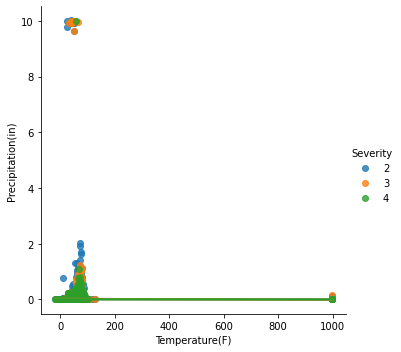

In [ ]:
# Gráfico no seaborn com informações de severidade, cidade, temperatura e precipitação

grafico_seaborn = sns.lmplot(x = 'Temperature(F)', y = 'Precipitation(in)', hue='Severity', data=acidentes_temp_prec)

grafico_seaborn

Análise de severidade por região

In [ ]:
# Análise de quantidade de acidente por severidade por região

acidente_sev = acidentes_renamed.groupby(['Severity', 'City'])['Severity'].count().reset_index(name='Qtd')
acidente_sev = acidente_regiao.sort_values(by='Severity', ascending=False)

acidente_sev

,Severity,City,Qtd
9525,4,Zwingle,1
7228,4,Forsyth,3
7304,4,Galway,1
7303,4,Galveston,2
7302,4,Galva,2
...,...,...,...
2624,2,Owatonna,8
2623,2,Oviedo,35
2622,2,Overland Park,87
2621,2,Ottumwa,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

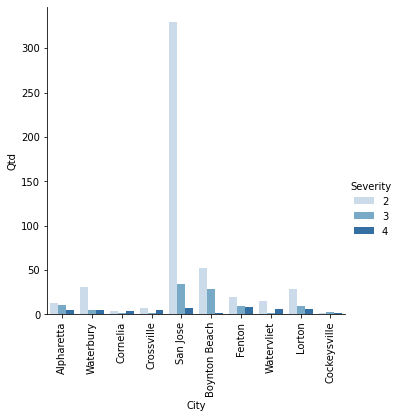

In [ ]:
sns.catplot(data=acidente_sev, x = 'City', y = 'Qtd', hue='Severity', order=acidente_regiao['City'].value_counts().iloc[:10].index, kind='bar', palette='Blues', col_order='Severity')
plt.xticks(rotation=90)

#Limitei o número de cidades que aparecem em 10 e rotacionei a legenda do eixo x para vertical